In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

In [2]:
car = pd.read_csv("CarPrice_Assignment.csv")
pd.set_option('display.max_columns', None)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#EDA

##variable pada data set

In [3]:
car.shape

(205, 26)

data ini memiliki 26 kolom dan 205 baris

In [4]:
car.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##Mengecek Missing Data

In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

tidak ada data yang hilang

##Deskripsi Data

In [7]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##Korelasi Data

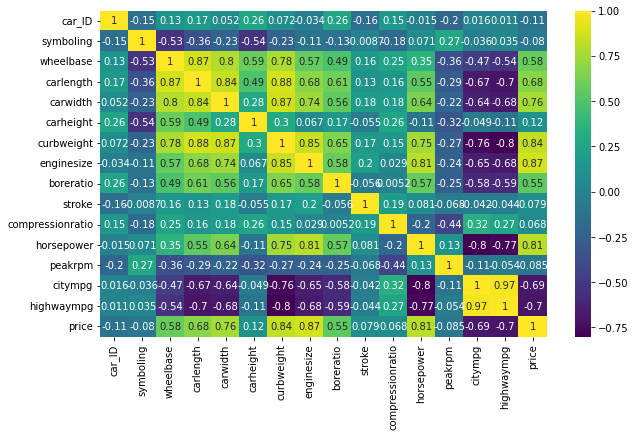

In [8]:
k = len(car.columns)
cm = car.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

#Pre-Processing

##Drop Data

In [9]:
car = car.drop(['car_ID','CarName'], axis=1)

##Menganalisis variabel numerik

In [10]:
numerik = [var for var in car.columns if car[var].dtype!='O']
print('Ada {} variabel numerik'.format(len(numerik)))
print('Variabel numeriknya adalah :', numerik)

Ada 15 variabel numerik
Variabel numeriknya adalah : ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [11]:
car[numerik].head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


In [12]:
car[numerik].isnull().sum() #mengecek missing value

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##Menganalisis variabel kategorik

In [13]:
kategorik = [var for var in car.columns if car[var].dtype=='O']
print('Ada {} variabel kategorik'.format(len(kategorik)))
print('Variabel kategoriknya yaitu :', kategorik)

Ada 9 variabel kategorik
Variabel kategoriknya yaitu : ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [14]:
car[kategorik].head(10)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [15]:
car[kategorik].isnull().sum() #mengecek missing value

fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 432x288 with 0 Axes>

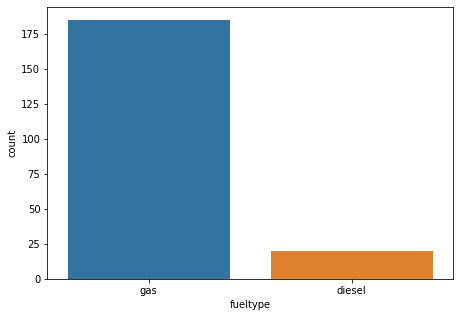

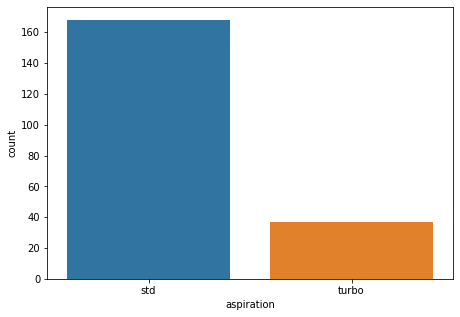

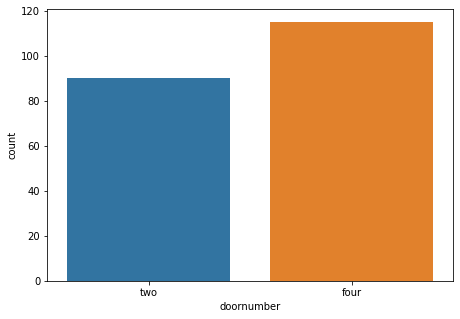

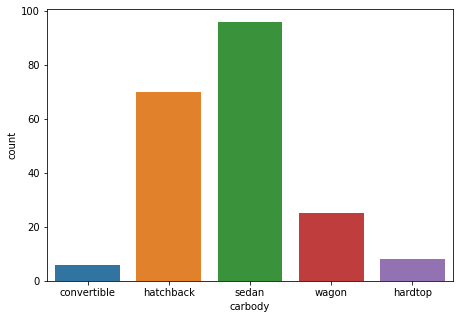

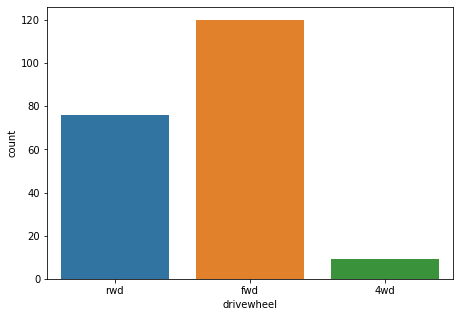

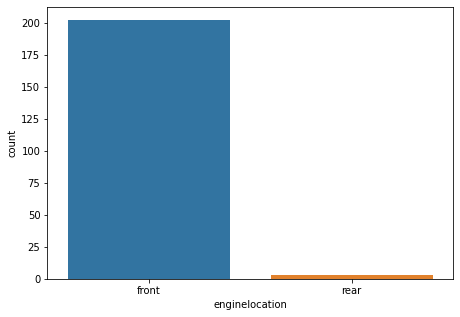

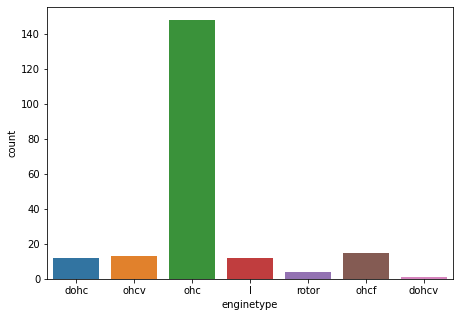

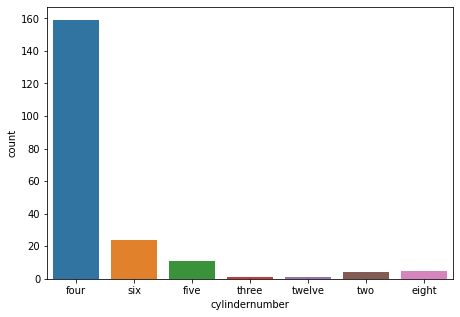

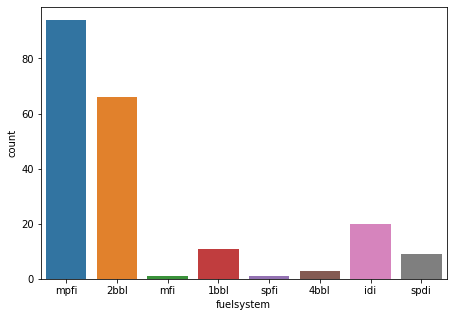

In [16]:
def car_vis(kategorik):
    plt.figure(1)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.countplot(car[kategorik])

for i in kategorik:
    car_vis(i)

<Figure size 432x288 with 0 Axes>

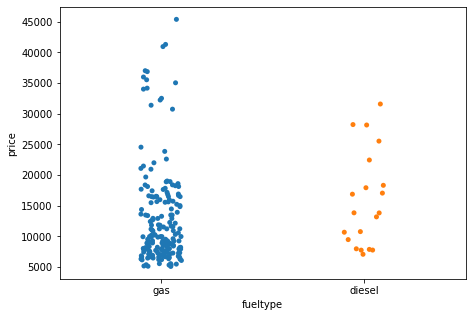

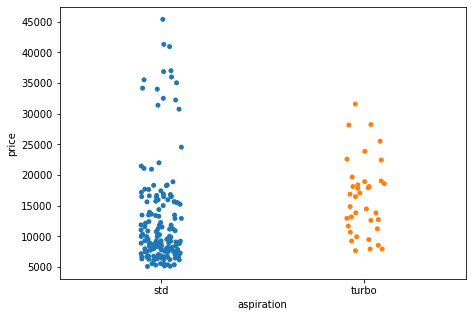

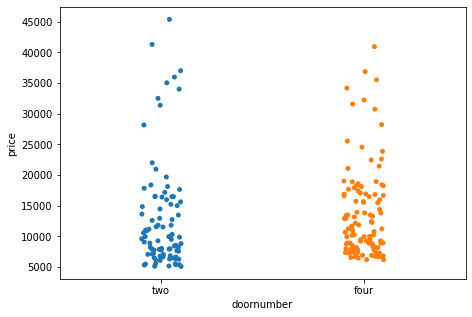

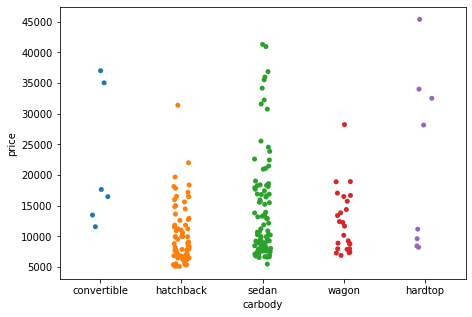

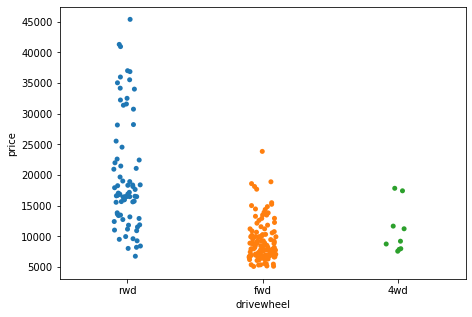

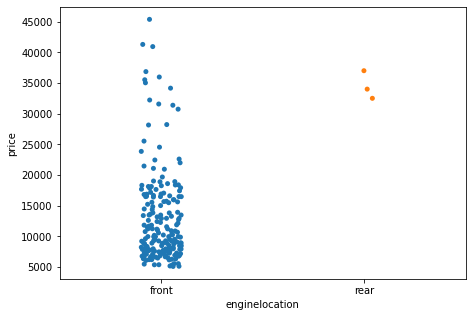

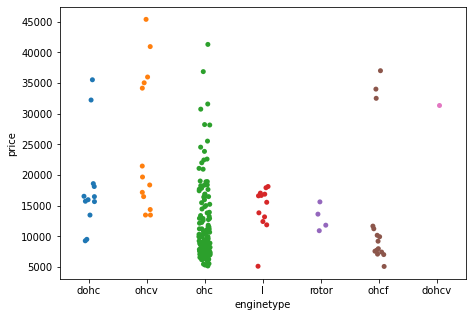

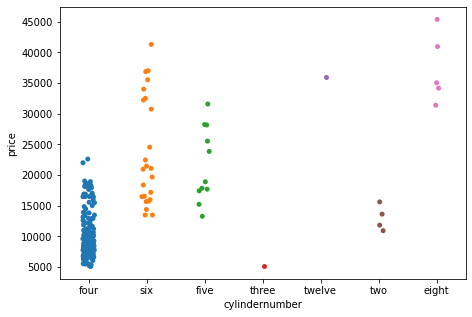

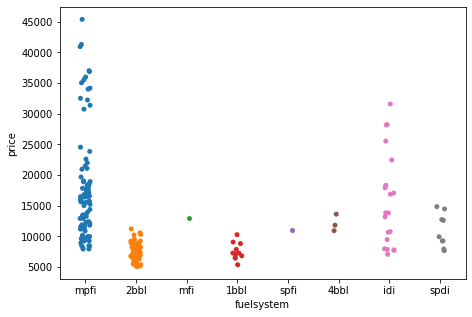

In [17]:
def rel_car(kategorik):
    plt.figure(1)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.stripplot(y=car['price'], x=car[kategorik])
for i in kategorik:
    rel_car(i)

##encoding


In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()    

car['fueltype'] = label_encoder.fit_transform(car['fueltype'])
car['aspiration'] = label_encoder.fit_transform(car['aspiration'])
car['doornumber'] = label_encoder.fit_transform(car['doornumber'])
car['carbody'] = label_encoder.fit_transform(car['carbody'])
car['drivewheel'] = label_encoder.fit_transform(car['drivewheel'])
car['enginelocation'] = label_encoder.fit_transform(car['enginelocation'])
car['enginetype'] = label_encoder.fit_transform(car['enginetype'])
car['cylindernumber'] = label_encoder.fit_transform(car['cylindernumber'])
car['fuelsystem'] = label_encoder.fit_transform(car['fuelsystem'])
car

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


#Linear Regresor

In [24]:
X=car[['symboling','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginetype', 'cylindernumber', 'enginesize', 'fuelsystem','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg']].values.reshape(-1,23)
X

array([[ 3.0e+00,  1.0e+00,  0.0e+00, ...,  5.0e+03,  2.1e+01,  2.7e+01],
       [ 3.0e+00,  1.0e+00,  0.0e+00, ...,  5.0e+03,  2.1e+01,  2.7e+01],
       [ 1.0e+00,  1.0e+00,  0.0e+00, ...,  5.0e+03,  1.9e+01,  2.6e+01],
       ...,
       [-1.0e+00,  1.0e+00,  0.0e+00, ...,  5.5e+03,  1.8e+01,  2.3e+01],
       [-1.0e+00,  0.0e+00,  1.0e+00, ...,  4.8e+03,  2.6e+01,  2.7e+01],
       [-1.0e+00,  1.0e+00,  1.0e+00, ...,  5.4e+03,  1.9e+01,  2.5e+01]])

In [25]:
y=car['price'].values.reshape(-1,1)
y

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.167],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


In [33]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [34]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)


Coefficients:  [[ 3.24715071e+02 -2.38954789e+01  1.58941582e+03 -1.30929359e+03
  -7.49516833e+02  2.11682388e+03  1.06450912e+04  6.29338691e+01
  -8.44226024e+01  7.94470070e+02  2.19750209e+02  1.85900820e+00
   5.62318341e+02 -9.88355925e+02  8.99356936e+01 -2.00193879e+02
  -2.79368245e+03 -2.80730893e+03  1.75037419e+02  1.80485006e+01
   1.56089100e+00 -1.75566207e+02  1.81462350e+01]]
Intercept:  [-48214.35312278]


Variance score: 0.7875265936146816


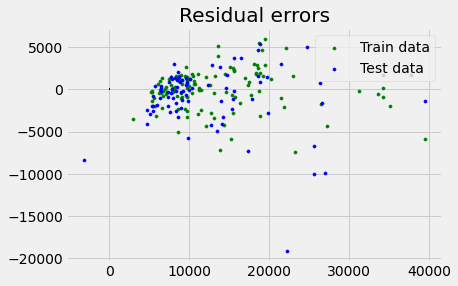

In [35]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

### Evaluation

In [29]:
y_pred = reg.predict(X_test)

In [30]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2711.4877413323597

In [31]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

14062559.341756001

In [32]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

3750.007912225786

##Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [[ 4.00527073e+02 -2.20778249e+02  1.36174341e+03 -1.36836060e+03
  -9.77399220e+02  1.92198508e+03  6.22045309e+03  6.13105378e+01
  -7.00080100e+01  6.02393408e+02  2.88615808e+02  1.84977065e+00
   6.81765968e+02 -1.00098319e+03  9.08236618e+01 -2.30211806e+02
  -1.92159297e+03 -2.75215348e+03  2.21482482e+02  2.85217522e+01
   2.09438941e+00 -1.82617462e+02  4.40202791e+01]]
Intercept:  [-48792.77270465]


###Evaluation

In [37]:
y_pred = model.predict(X_test)

In [38]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2404.44131340032

In [40]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


13439905.49455338

In [41]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

3666.047666705028

#Decition Tree Regressor

In [42]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [43]:
from sklearn.model_selection import cross_val_predict

score = cross_val_predict(regressor,X,y)
print(score)
np.mean(score)

[11850.  11850.  12764.   9960.  12764.  11850.  16845.  16845.  19045.
 15998.   9960.   9960.  12764.  12764.  18280.  40960.  40960.  40960.
  5572.   8916.5  8916.5  5572.   6095.   7957.   6229.   6669.   6669.
  7957.   8921.  12764.   5389.   8916.5  5572.   8916.5  8916.5  6938.
  6938.   8358.   8358.   9538.   9295.  10198.   9095.   6989.   6295.
  6575.  11549.  36880.  36880.  41315.   6338.   6338.   6338.   7499.
  7499.  14997.5 14997.5 14997.5 14997.5 13845.  13845.  13845.  13845.
 13845.  13845.  11199.  11199.  22470.  22470.  22470.  22470.  36880.
 37028.  36880.  41315.  18150.   5572.   6377.   6377.   7957.  14997.5
 14997.5 12764.  12764.  12764.   9720.   9720.   9959.   9959.   6695.
  7738.   6695.   6695.   6938.   7395.   6795.   7395.   6938.   6795.
  9959.   9959.  30760.  30760.  30760.  33278.  33278.  31400.5 19045.
 18344.  22625.  24565.  22625.  18344.  22625.  24565.  22625.  18344.
 23875.   5389.   7689.   6229.   7150.5  7126.   8921.  18420.

14611.490243902439

In [44]:
regressor.score(X_test,y_test)

0.9985799422761296

In [47]:
y_pred

array([ 6669. ,  7999. ,  6338. ,  8916.5, 10295. , 25552. ,  8249. ,
        5151. ,  6488. ,  9370. , 17450. , 17669. , 16515. ,  9095. ,
       12964. , 11199. ,  9980. ,  6529. , 18150. , 11259. ,  8948. ,
        6855. , 16925. ,  7957. ,  9989. ,  7129. , 14489. ,  7995. ,
        6229. ,  7295. ,  8058. ,  8921. , 41315. ,  9295. , 17425. ,
        7775. ,  8558. , 33900. , 15645. , 22625. ,  5118. , 18399. ,
        7099. , 10198. ,  8195. ,  7799. , 40960. ,  6095. , 18150. ,
       13499. , 28176. , 11900. , 24565. ,  9258. ,  9720. ,  6295. ,
       11248. ,  8845. , 13860. ,  8238. , 11395. , 10898. , 12764. ,
       15750. ,  7898. ,  6695. ,  7299. ,  9960. , 19699. , 11850. ,
       10345. , 36880. , 15250. ,  5348. , 18950. , 33900. ,  9298. ,
       18344. , 17075. ,  7395. ,  7349. ,  7609. ])

In [52]:
y_pred = regressor.predict(X_test)
y_pred_reshaped=np.reshape(y_pred,(82))
y_test_reshaped=np.reshape(y_test,(82))
result = pd.DataFrame({'prediksi':y_pred_reshaped,'aktual':y_test_reshaped}).astype(float)
result.to_csv()

',prediksi,aktual\n0,6669.0,6669.0\n1,7999.0,7999.0\n2,6338.0,6338.0\n3,8916.5,8916.5\n4,10295.0,10295.0\n5,25552.0,25552.0\n6,8249.0,8249.0\n7,5151.0,5151.0\n8,6488.0,6488.0\n9,9370.0,10245.0\n10,17450.0,17450.0\n11,17669.0,17669.0\n12,16515.0,16515.0\n13,9095.0,9095.0\n14,12964.0,12964.0\n15,11199.0,11199.0\n16,9980.0,9980.0\n17,6529.0,6529.0\n18,18150.0,18150.0\n19,11259.0,11259.0\n20,8948.0,8948.0\n21,6855.0,6855.0\n22,16925.0,16925.0\n23,7957.0,7957.0\n24,9989.0,9989.0\n25,7129.0,7129.0\n26,14489.0,14489.0\n27,7995.0,7995.0\n28,6229.0,6229.0\n29,7295.0,7295.0\n30,8058.0,8058.0\n31,8921.0,8921.0\n32,41315.0,41315.0\n33,9295.0,9295.0\n34,17425.0,17950.0\n35,7775.0,7775.0\n36,8558.0,8558.0\n37,33900.0,32250.0\n38,15645.0,15645.0\n39,22625.0,22625.0\n40,5118.0,5118.0\n41,18399.0,18399.0\n42,7099.0,7099.0\n43,10198.0,10198.0\n44,8195.0,8195.0\n45,7799.0,7799.0\n46,40960.0,40960.0\n47,6095.0,6095.0\n48,18150.0,18150.0\n49,13499.0,13499.0\n50,28176.0,28176.0\n51,11900.0,11900.0\n52,24565

In [54]:
symboling=input('symboling =')
fueltype=input('fueltype =')
aspiration=input('aspiration=')
doornumber=input('doornumber=')
carbody=input('carbody=')
drivewheel=input('drivewheel =')
enginelocation=input('enginelocation =')
wheelbase=input('wheelbase=')
carlength=input('carlength=')
carwidth=input('carwidth=')
carheight=input('carheight =')
curbweight=input('curbweight =')
enginetype=input('enginetype=')
cylindernumber=input('cylindernumber=')
enginesize=input('enginesize=')
fuelsystem=input('fuelsystem =')
boreratio=input('boreratio =')
stroke=input('stroke=')
compressionratio=input('compressionratio=')
horsepower=input('horsepower=')
peakrpm=input('peakrpm=')
citympg=input('citympg=')
highwaympg=input('highwaympg=')
val = regressor.predict(np.array([symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg]).reshape(-1,23))
print('Prediksi :')

pd.DataFrame({'symboling': symboling,'fueltype':fueltype,'aspiration':aspiration,'doornumber':doornumber,'carbody':carbody,'drivewheel': drivewheel,'enginelocation':enginelocation,'wheelbase':wheelbase,'carlength':carlength,'carwidth':carwidth,'carheight': carheight,
              'curbweight':curbweight,'enginetype':enginetype,'cylindernumber':cylindernumber,'enginesize':enginesize,'fuelsystem': fuelsystem,'boreratio':boreratio,'stroke':stroke,'compressionratio':compressionratio,'horsepower':horsepower,'peakrpm':peakrpm,'citympg':citympg,
              'highwaympg':highwaympg,'Prediksi':val})


symboling =3
fueltype =1
aspiration=0
doornumber=1
carbody=0
drivewheel =2
enginelocation =0
wheelbase=88.6
carlength=168.8
carwidth=64.1
carheight =48.8
curbweight =2548
enginetype=0
cylindernumber=2
enginesize=130
fuelsystem =5
boreratio =3.47
stroke=2.68
compressionratio=9.0
horsepower=111
peakrpm=5000
citympg=21
highwaympg=27
Prediksi :


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Prediksi
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,14997.5
